In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn import ensemble

In [2]:
df=pd.read_csv('Documents/credit_default.csv')
df.head()
#print(df)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
df.info

<bound method DataFrame.info of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  

In [6]:
df.drop('ID',axis=1,inplace=True)
df[:10]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,50000.0,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,500000.0,1,1,2,29,0,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,100000.0,2,2,2,23,0,-1,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,140000.0,2,3,1,28,0,0,2,0,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,20000.0,1,3,2,35,-2,-2,-2,-2,-1,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [7]:
df.rename(columns={'default.payment.next.month':'default','PAY_0':'PAY_1'},inplace=True)
df[:11]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,50000.0,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,500000.0,1,1,2,29,0,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,100000.0,2,2,2,23,0,-1,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,140000.0,2,3,1,28,0,0,2,0,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,20000.0,1,3,2,35,-2,-2,-2,-2,-1,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [8]:
df['PAY_1'].value_counts()/df.shape[0]

PAY_1
 0    0.491233
-1    0.189533
 1    0.122933
-2    0.091967
 2    0.088900
 3    0.010733
 4    0.002533
 5    0.000867
 8    0.000633
 6    0.000367
 7    0.000300
Name: count, dtype: float64

In [9]:
cols=['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
df[cols]=df[cols].replace(0,-1)
df['PAY_1'].value_counts()

PAY_1
-1    20423
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

In [10]:
cols=['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
df=df.drop(df[(df[cols]==-2).any(axis=1)].index)
df['PAY_1'].value_counts()

PAY_1
-1    18299
 2     2518
 1     2181
 3      305
 4       74
 5       23
 8       19
 6       11
 7        9
Name: count, dtype: int64

In [11]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    12632
1    10495
3      274
0       38
Name: count, dtype: int64

In [12]:
df=df.drop(df[df['MARRIAGE']==0].index)
df['MARRIAGE'].value_counts()

MARRIAGE
2    12632
1    10495
3      274
Name: count, dtype: int64

In [13]:
df['EDUCATION'].value_counts()

EDUCATION
2    11519
1     7564
3     3995
5      205
4       72
6       38
0        8
Name: count, dtype: int64

In [14]:
df['EDUCATION']=df['EDUCATION'].replace(6,5)
df=df.drop(df[df['EDUCATION']==0].index)
df['EDUCATION'].value_counts()

EDUCATION
2    11519
1     7564
3     3995
5      243
4       72
Name: count, dtype: int64

VISUALIZATON

<Axes: xlabel='BILL_AMT2', ylabel='LIMIT_BAL'>

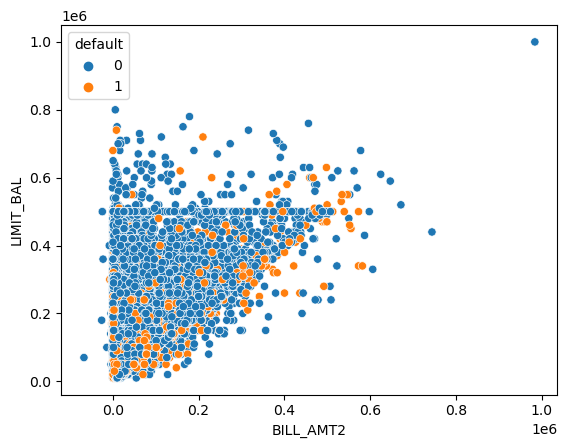

In [15]:
sns.scatterplot(x='BILL_AMT2',y='LIMIT_BAL',hue='default',data=df)

In [16]:
df['default'].value_counts()/df.shape[0]

default
0    0.769931
1    0.230069
Name: count, dtype: float64

In [17]:
pd.crosstab(index=df['MARRIAGE'],columns=df['default'],normalize='index')

default,0,1
MARRIAGE,,
1,0.754503,0.245497
2,0.783621,0.216379
3,0.729927,0.270073


In [18]:
pd.crosstab(index=df['EDUCATION'],columns=df['default'],normalize='index')

default,0,1
EDUCATION,,
1,0.804469,0.195531
2,0.752843,0.247157
3,0.741427,0.258573
4,0.958333,0.041667
5,0.917695,0.082305


In [19]:
pd.crosstab(index=df['SEX'],columns=df['default'],normalize='index')

default,0,1
SEX,,
1,0.750026,0.249974
2,0.783641,0.216359


In [20]:
pd.crosstab(index=df['PAY_1'],columns=df['default'],normalize='index')

default,0,1
PAY_1,,
-1,0.863283,0.136717
1,0.624655,0.375345
2,0.304970,0.695030
3,0.229508,0.770492
4,0.324324,0.675676
5,0.454545,0.545455
6,0.454545,0.545455
7,0.222222,0.777778
8,0.421053,0.578947


In [21]:
pd.crosstab(index=df['PAY_2'],columns=df['default'],normalize='index')

default,0,1
PAY_2,,
-1,0.841591,0.158409
1,0.937500,0.062500
2,0.438697,0.561303
3,0.384858,0.615142
4,0.478723,0.521277
5,0.400000,0.600000
6,0.250000,0.750000
7,0.400000,0.600000
8,1.000000,0.000000


In [22]:
df[df['PAY_2']==4]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
848,150000.0,1,3,1,37,4,4,4,3,2,...,147989.0,143355.0,143131.0,6500.0,0.0,512.0,0.0,4388.0,4221.0,1
1390,60000.0,1,2,1,37,3,4,3,2,2,...,29729.0,30505.0,32232.0,366.0,0.0,1300.0,1400.0,2400.0,2300.0,1
2102,10000.0,2,3,1,53,1,4,3,2,2,...,3856.0,4390.0,4171.0,0.0,0.0,0.0,900.0,0.0,900.0,1
3033,50000.0,2,2,2,54,-1,4,3,2,3,...,1415.0,1115.0,569.0,0.0,0.0,323.0,0.0,0.0,1188.0,0
3822,80000.0,2,3,2,27,1,4,3,2,-1,...,51537.0,51381.0,48866.0,0.0,0.0,0.0,1790.0,1890.0,1740.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29651,50000.0,1,3,1,41,5,4,3,2,-1,...,50307.0,27707.0,28479.0,0.0,0.0,0.0,0.0,974.0,31100.0,1
29668,70000.0,1,2,1,42,4,4,4,4,4,...,63359.0,64221.0,65706.0,2272.0,3614.0,3100.0,2500.0,3100.0,1000.0,1
29771,10000.0,1,2,1,37,-1,4,3,2,2,...,6730.0,7463.0,7199.0,0.0,0.0,0.0,1000.0,0.0,3000.0,1
29814,50000.0,1,2,2,49,5,4,3,2,-1,...,48640.0,17450.0,60.0,0.0,0.0,0.0,2000.0,1003.0,1076.0,0


In [23]:
df=df[df['PAY_2']!=4]

<Axes: xlabel='AGE', ylabel='LIMIT_BAL'>

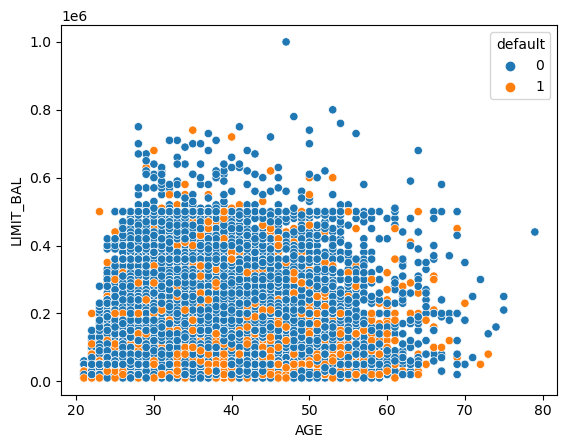

In [24]:
sns.scatterplot(x='AGE',y='LIMIT_BAL',hue='default',data=df)

In [25]:
df['EDUCATION'].value_counts()/df.shape[0]

EDUCATION
2    0.491695
1    0.324091
3    0.170737
5    0.010387
4    0.003090
Name: count, dtype: float64

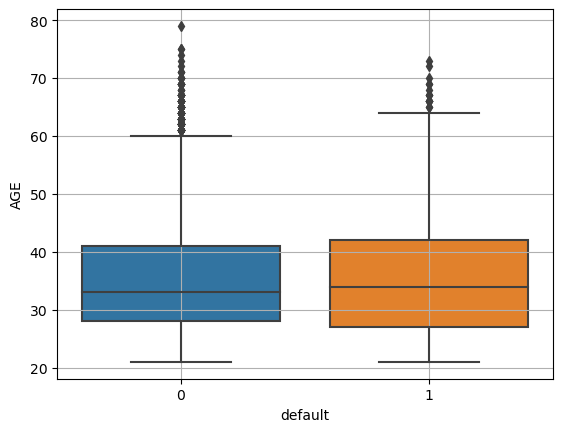

In [26]:
sns.boxplot(y='AGE',x='default',data=df)
plt.grid(True)

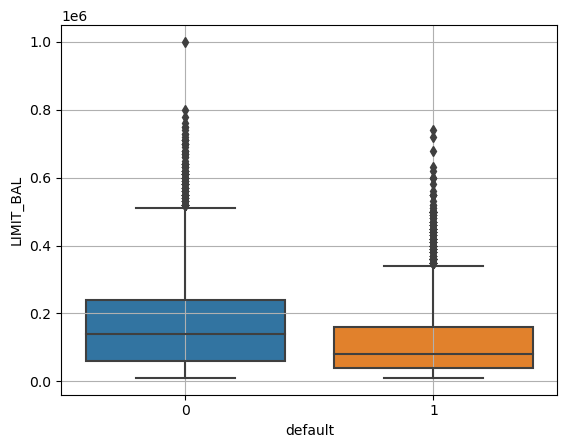

In [27]:
sns.boxplot(y='LIMIT_BAL',x='default',data=df)
plt.grid(True)

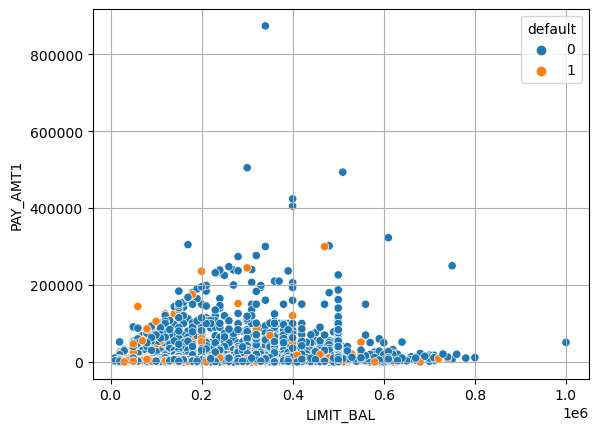

In [28]:
sns.scatterplot(x='LIMIT_BAL',y='PAY_AMT1',hue='default',data=df)
plt.grid(True)

Text(0.5, 1.0, 'Default Payment by Gender')

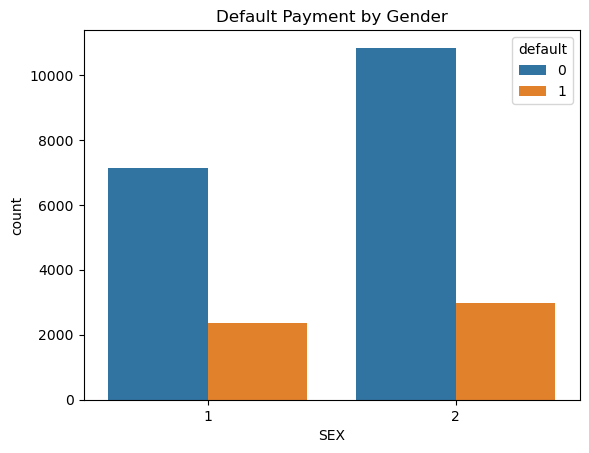

In [29]:
sns.countplot(x='SEX',hue='default',data=df)
plt.title('Default Payment by Gender')

Text(0.5, 1.0, 'Default Payment by Education')

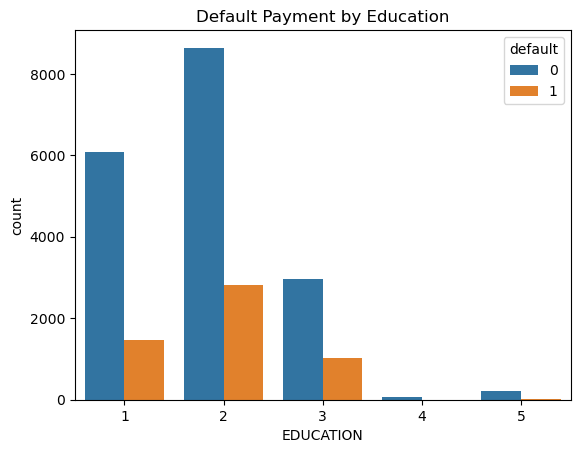

In [30]:
sns.countplot(x='EDUCATION',hue='default',data=df)
plt.title('Default Payment by Education')

Text(0.5, 1.0, 'Default Payment by Marriage')

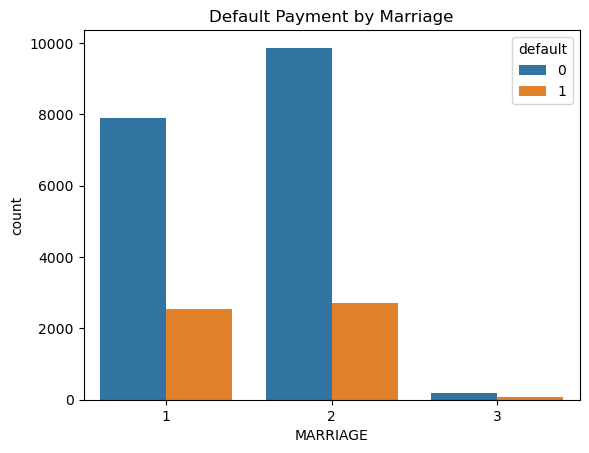

In [31]:
sns.countplot(x='MARRIAGE',hue='default',data=df)
plt.title('Default Payment by Marriage')

/Users/sayanjr9/Documents/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


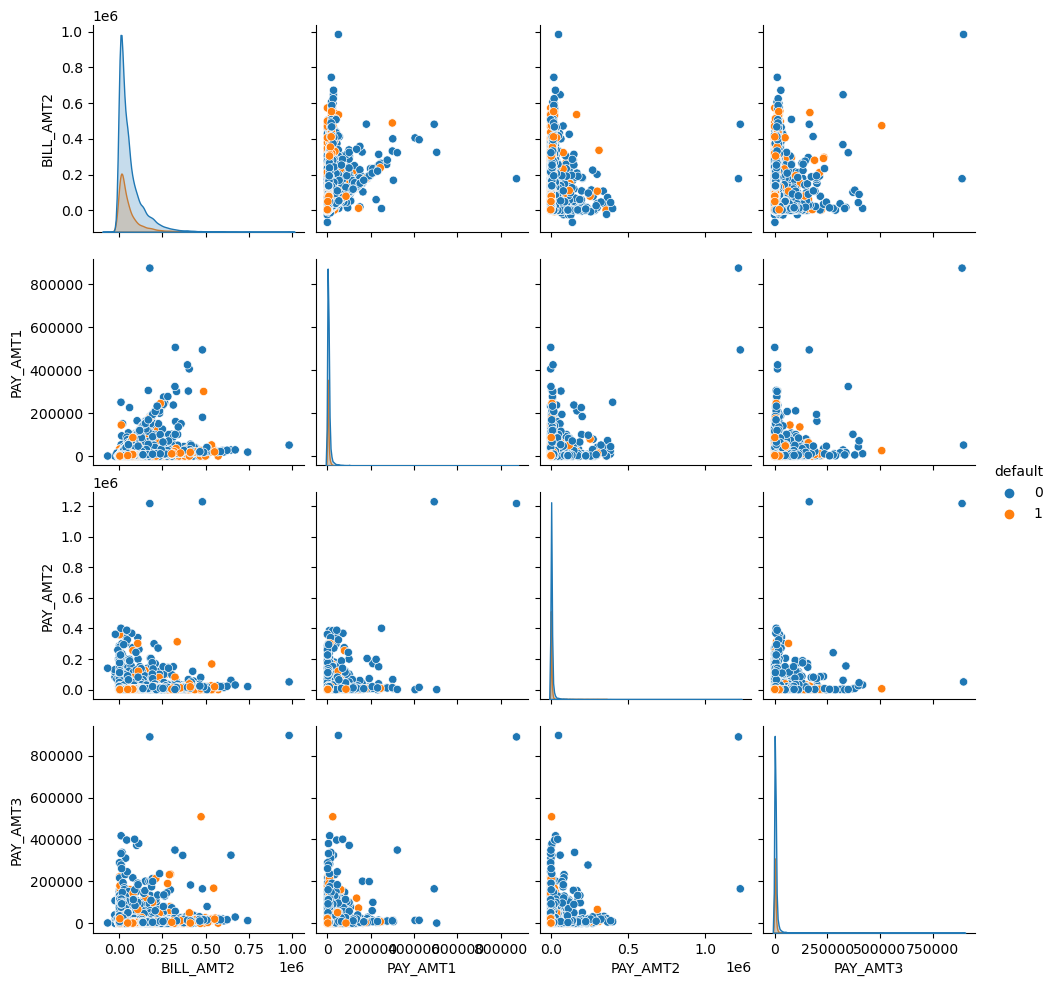

In [32]:
sns.pairplot(data=df,hue='default',vars=['BILL_AMT2','PAY_AMT1','PAY_AMT2','PAY_AMT3'])

In [33]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

For same limit balance, if bill amt increases, default increases

High balance limit defaults less

Age, Gender, Education, Marriage has no signifiacnce

Prediction

In [34]:
x=df.drop(['default'],axis=1)
y=df['default']
xtrain,xtest,ytrain,ytest,=model_selection.train_test_split(x,y,test_size=.30,random_state=42)

In [35]:
grid={'n_estimators':[150,200,250,300,350],'max_depth':[4,5,6,7,8],'min_samples_split':[40,50,60,70]}
model=ensemble.RandomForestClassifier(random_state=42)
gridobj=model_selection.GridSearchCV(estimator=model,param_grid=grid,scoring='recall',n_jobs=-1,cv=5,
                                     return_train_score=True)
gridobj.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_split': [40, 50, 60, 70],
                         'n_estimators': [150, 200, 250, 300, 350]},
             return_train_score=True, scoring='recall')

In [36]:
print(gridobj.best_params_)

{'max_depth': 8, 'min_samples_split': 70, 'n_estimators': 300}


In [37]:
gridobj.best_score_

0.4077127659574469

In [38]:
model=ensemble.RandomForestClassifier(n_estimators=100,max_depth=6,random_state=42,n_jobs=-1)
model.fit(xtrain,ytrain)
predtrain=model.predict(xtrain)
predtest=model.predict(xtest)
def printscores(act,pred):
    print('Accuracy:',metrics.accuracy_score(act,pred))
    print('Recall:',metrics.recall_score(act,pred))
    print('Precision:',metrics.precision_score(act,pred))
    print('F1:',metrics.f1_score(act,pred))
    print('AUC:',metrics.roc_auc_score(act,pred))
print('TRAINING METRICS:')
printscores(ytrain,predtrain)
print('=================')
print('TEST METRICS:')
printscores(ytest,predtest)

TRAINING METRICS:
Accuracy: 0.832301183395671
Recall: 0.4252659574468085
Precision: 0.7358490566037735
F1: 0.539019046013821
AUC: 0.6897626304884851
TEST METRICS:
Accuracy: 0.825035765379113
Recall: 0.39669421487603307
Precision: 0.6948775055679287
F1: 0.5050586806960744
AUC: 0.6730563560996373


In [39]:
pd.Series(model.feature_importances_,index=xtrain.columns).sort_values(ascending=False)

PAY_1        0.369185
PAY_2        0.143293
PAY_4        0.075419
PAY_3        0.062880
PAY_5        0.061161
PAY_6        0.051332
PAY_AMT1     0.039078
PAY_AMT2     0.028394
LIMIT_BAL    0.025465
PAY_AMT3     0.024783
BILL_AMT2    0.013759
PAY_AMT5     0.012949
BILL_AMT3    0.012654
BILL_AMT1    0.012166
PAY_AMT4     0.011824
BILL_AMT4    0.011424
BILL_AMT5    0.011290
PAY_AMT6     0.010584
BILL_AMT6    0.009197
AGE          0.007348
EDUCATION    0.003606
MARRIAGE     0.001329
SEX          0.000879
dtype: float64

In [40]:
model=ensemble.RandomForestClassifier(max_depth=8,min_samples_split=40,n_estimators=200,random_state=42,n_jobs=-1)
rfeobj=feature_selection.RFE(estimator=model,n_features_to_select=20)
rfeobj.fit(xtrain,ytrain)
print('SIGNIFICANT COLUMNS:',xtrain.columns[rfeobj.support_])
arr=rfeobj.transform(xtrain)
xtrain1=pd.DataFrame(arr,columns=xtrain.columns[rfeobj.support_],index=xtrain.index)
xtest1=pd.DataFrame(rfeobj.transform(xtest),columns=xtest.columns[rfeobj.support_],index=xtest.index)

SIGNIFICANT COLUMNS: Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


In [41]:
model=ensemble.RandomForestClassifier(max_depth=7,min_samples_split=50,n_estimators=400,random_state=42,n_jobs=-1)
model.fit(xtrain1,ytrain)
predtrain=model.predict(xtrain1)
predtest=model.predict(xtest1)
def printscores(act,pred):
    print('Accuracy:',metrics.accuracy_score(act,pred))
    print('Recall:',metrics.recall_score(act,pred))
    print('Precision:',metrics.precision_score(act,pred))
    print('F1:',metrics.f1_score(act,pred))
    print('AUC:',metrics.roc_auc_score(act,pred))
print('TRAINING METRICS:')
printscores(ytrain,predtrain)
print('=================')
print('TEST METRICS:')
printscores(ytest,predtest)

TRAINING METRICS:
Accuracy: 0.8331596051260041
Recall: 0.43617021276595747
Precision: 0.7318161535029005
F1: 0.5465755707382103
AUC: 0.6941389752171488
TEST METRICS:
Accuracy: 0.8253218884120171
Recall: 0.410680228862047
Precision: 0.6872340425531915
F1: 0.5141265419816952
AUC: 0.678203322848967


In [42]:
from imblearn.under_sampling import NearMiss 
ns=NearMiss(sampling_strategy='not minority')
xtrain,ytrain=ns.fit_resample(xtrain,ytrain)
print(pd.DataFrame(ytrain).value_counts())
xtest,ytest=ns.fit_resample(xtest,ytest)
print(pd.DataFrame(ytest).value_counts())

default
0          3760
1          3760
Name: count, dtype: int64
default
0          1573
1          1573
Name: count, dtype: int64


In [43]:
model=ensemble.RandomForestClassifier(max_depth=40,min_samples_split=70,n_estimators=150,random_state=42,n_jobs=-1)
model.fit(xtrain,ytrain)
predtrain=model.predict(xtrain)
predtest=model.predict(xtest)
def printscores(act,pred):
    print('Accuracy:',metrics.accuracy_score(act,pred))
    print('Recall:',metrics.recall_score(act,pred))
    print('Precision:',metrics.precision_score(act,pred))
    print('F1:',metrics.f1_score(act,pred))
    print('AUC:',metrics.roc_auc_score(act,pred))
print('TRAINING METRICS:')
printscores(ytrain,predtrain)
print('=================')
print('TEST METRICS:')
printscores(ytest,predtest)

TRAINING METRICS:
Accuracy: 0.8125
Recall: 0.7672872340425532
Precision: 0.8435672514619883
F1: 0.8036211699164345
AUC: 0.8125
TEST METRICS:
Accuracy: 0.766369993642721
Recall: 0.7132867132867133
Precision: 0.7980085348506402
F1: 0.7532729103726084
AUC: 0.766369993642721
